Install & Read File Program

In [ ]:
!pip install tensor-dash

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import pandas as pd

In [ ]:
# Reading the Training Data
dataset = pd.read_csv('/content/drive/MyDrive/Akademik/Python/PlantDetection/train1.csv')

In [ ]:
# Importing Necessary Libraries
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensordash.tensordash import Tensordash
import plotly.express as px
import json
import skimage.io as io
#user_secrets = UserSecretsClient()
#secret_value_0 = user_secrets.get_secret("email")
#secret_value_1 = user_secrets.get_secret("pin")

In [ ]:
dataset

,image_id,healthy,damaged_fungi,damaged_pests,nutrition_wilted,nutrition_dry
0,Train_0,0,1,0,0,0
1,Train_1,0,1,0,0,0
2,Train_2,0,1,0,0,0
3,Train_3,0,1,0,0,0
4,Train_4,0,1,0,0,0
5,Train_5,0,1,0,0,0
6,Train_6,0,1,0,0,0
7,Train_7,0,1,0,0,0
8,Train_8,0,1,0,0,0
9,Train_9,0,1,0,0,0


Data Exploration

In [ ]:
dataset.isnull().any()

image_id            False
healthy             False
damaged_fungi       False
damaged_pests       False
nutrition_wilted    False
nutrition_dry       False
dtype: bool

In [ ]:
dataset.dtypes

image_id            object
healthy              int64
damaged_fungi        int64
damaged_pests        int64
nutrition_wilted     int64
nutrition_dry        int64
dtype: object

In [ ]:
dataset['image_id'] = dataset['image_id']+'.jpg'

In [ ]:
dataset

,image_id,healthy,damaged_fungi,damaged_pests,nutrition_wilted,nutrition_dry
0,Train_0.jpg,0,1,0,0,0
1,Train_1.jpg,0,1,0,0,0
2,Train_2.jpg,0,1,0,0,0
3,Train_3.jpg,0,1,0,0,0
4,Train_4.jpg,0,1,0,0,0
5,Train_5.jpg,0,1,0,0,0
6,Train_6.jpg,0,1,0,0,0
7,Train_7.jpg,0,1,0,0,0
8,Train_8.jpg,0,1,0,0,0
9,Train_9.jpg,0,1,0,0,0


Data Visualisation

Classes Distribution

Text(0.5, 1.0, 'Healthy')

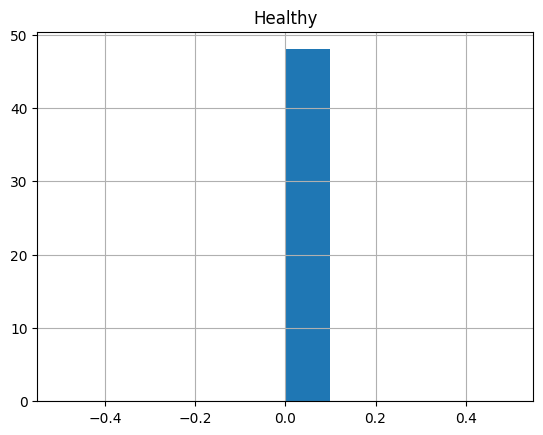

In [ ]:
dataset.healthy.hist()
plt.title('Healthy')

Text(0.5, 1.0, 'Damaged - Fungi')

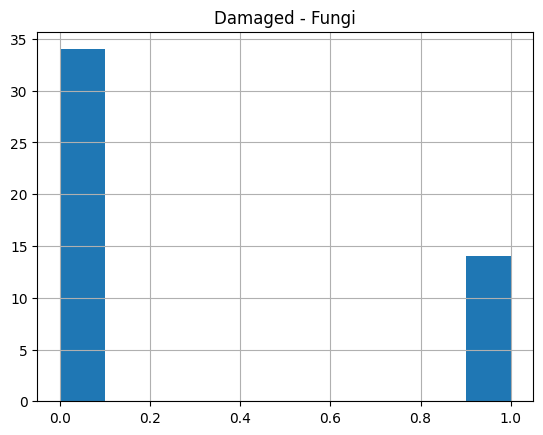

In [ ]:
dataset.damaged_fungi.hist()
plt.title('Damaged - Fungi')

Text(0.5, 1.0, 'Damaged - Pests')

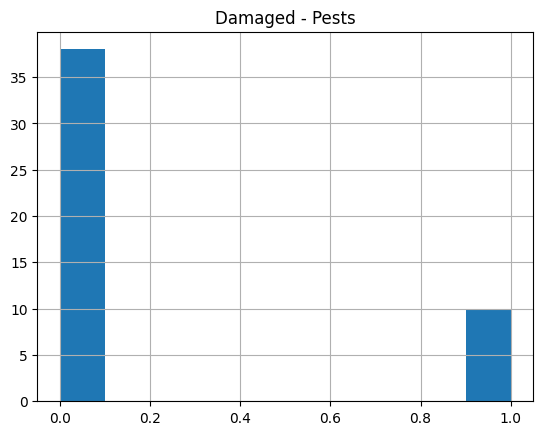

In [ ]:
dataset.damaged_pests.hist()
plt.title('Damaged - Pests')

Text(0.5, 1.0, 'Nutrition - Wilted')

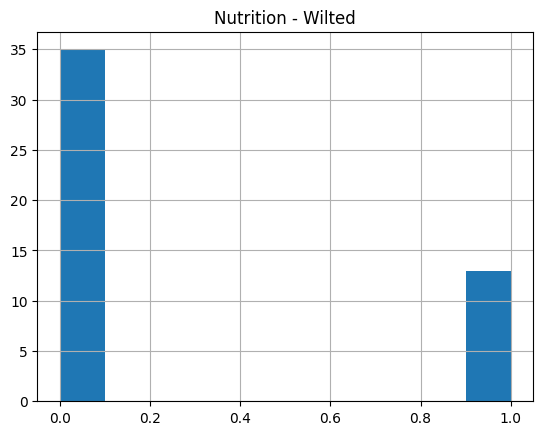

In [ ]:
dataset.nutrition_wilted.hist()
plt.title('Nutrition - Wilted')

Text(0.5, 1.0, 'Nutrition - Dry')

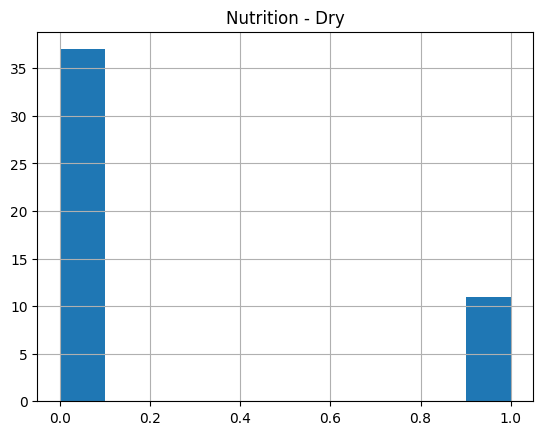

In [ ]:
dataset.nutrition_dry.hist()
plt.title('Nutrition - Dry')

Class Image Visualisation

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 5
rows = 5
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'/content/drive/MyDrive/Akademik/Python/PlantDetection/Datasheet/tes_{i}.jpg')
       fig.add_subplot(rows, columns, i)

    if dataset.healthy[i] == 1:
        plt.title('Healthy')
    elif dataset.damaged_fungi[i] == 1:
        plt.title('Damaged - Fungi')
    elif dataset.damaged_pests[i] == 1:
        plt.title('Damaged - Pests')
    elif dataset.nutrition_dry[i] == 1:
        plt.title('Nutrition - Dry')
    else:
        plt.title('Nutrition - Dry')
    plt.imshow(img)
    plt.axis('off')
plt.show()

IndentationError: ignored